# Análisis exploratorio

In [1]:
import pandas as pd
import regex
import unidecode
import os, glob
import cv2
import plotly.express as px
import matplotlib.pyplot as plt

In [169]:
!pip install opencv-python
!pip install plotly==5.10.0
!pip install pillow
!pip install regex
!pip install Unidecode

## Categorías de productos

In [2]:
import requests
cats = requests.get('https://api.mercadolibre.com/sites/MLA/categories')
prod_categories= cats.json()

In [29]:
prod_categories

[{'id': 'MLA5725', 'name': 'Accesorios para Vehículos'},
 {'id': 'MLA1512', 'name': 'Agro'},
 {'id': 'MLA1403', 'name': 'Alimentos y Bebidas'},
 {'id': 'MLA1071', 'name': 'Animales y Mascotas'},
 {'id': 'MLA1367', 'name': 'Antigüedades y Colecciones'},
 {'id': 'MLA1368', 'name': 'Arte, Librería y Mercería'},
 {'id': 'MLA1743', 'name': 'Autos, Motos y Otros'},
 {'id': 'MLA1384', 'name': 'Bebés'},
 {'id': 'MLA1246', 'name': 'Belleza y Cuidado Personal'},
 {'id': 'MLA1039', 'name': 'Cámaras y Accesorios'},
 {'id': 'MLA1051', 'name': 'Celulares y Teléfonos'},
 {'id': 'MLA1648', 'name': 'Computación'},
 {'id': 'MLA1144', 'name': 'Consolas y Videojuegos'},
 {'id': 'MLA1500', 'name': 'Construcción'},
 {'id': 'MLA1276', 'name': 'Deportes y Fitness'},
 {'id': 'MLA5726', 'name': 'Electrodomésticos y Aires Ac.'},
 {'id': 'MLA1000', 'name': 'Electrónica, Audio y Video'},
 {'id': 'MLA2547', 'name': 'Entradas para Eventos'},
 {'id': 'MLA407134', 'name': 'Herramientas'},
 {'id': 'MLA1574', 'name': 'H

In [75]:
type(dict(cats.json()))

dict

En total contamos con 32 categorías 

## Ítems

In [41]:
offsets = [0,50,100,150,200,250]
full_items = []
items_dict_0 = {}
for i in offsets: 
    cat_id = 'MLA1276' #deportes y fitness
    url = f'https://api.mercadolibre.com/sites/MLA/search?category={cat_id}&offset={i}'
    request = requests.get(url)
    items_dict = request.json()
    full_items.append(items_dict)
for j in full_items: 
    items_dict_0.update(j)

In [61]:
cat_id = 'MLA1276' #deportes y fitness
url = f'https://api.mercadolibre.com/sites/MLA/search?category={cat_id}&offset={50}'
request = requests.get(url)
items_dict = request.json()

In [63]:
results = []
offsets = list(range(0,500,50))
cat_id = 'MLA1276' #deportes y fitness
for off in offsets:
    url = f'https://api.mercadolibre.com/sites/MLA/search?category={cat_id}&offset={off}'
    request = requests.get(url)
    data = request.json()
    for element in data['results']:
        results.append(element)

In [69]:
len(results)

300

In [38]:
items['results'][0].keys()

dict_keys(['id', 'site_id', 'title', 'seller', 'price', 'prices', 'sale_price', 'currency_id', 'available_quantity', 'sold_quantity', 'buying_mode', 'listing_type_id', 'stop_time', 'condition', 'permalink', 'thumbnail', 'thumbnail_id', 'accepts_mercadopago', 'installments', 'address', 'shipping', 'seller_address', 'attributes', 'original_price', 'category_id', 'official_store_id', 'domain_id', 'catalog_product_id', 'tags', 'catalog_listing', 'use_thumbnail_id', 'offer_score', 'offer_share', 'match_score', 'winner_item_id', 'melicoin', 'discounts', 'order_backend'])

In [117]:
items['results'][1]['attributes'] #se pueden extraer atributos de peso y volumen 

[{'value_struct': None,
  'id': 'BRAND',
  'value_id': '5377326',
  'value_name': 'ENA Sport',
  'attribute_group_name': 'Otros',
  'source': 1,
  'name': 'Marca',
  'values': [{'id': '5377326',
    'name': 'ENA Sport',
    'struct': None,
    'source': 1}],
  'attribute_group_id': 'OTHERS'},
 {'attribute_group_name': 'Otros',
  'source': 2860837171021627,
  'name': 'Condición del ítem',
  'value_name': 'Nuevo',
  'value_struct': None,
  'values': [{'id': '2230284',
    'name': 'Nuevo',
    'struct': None,
    'source': 2860837171021627}],
  'id': 'ITEM_CONDITION',
  'value_id': '2230284',
  'attribute_group_id': 'OTHERS'},
 {'value_name': 'ENA Sport',
  'value_struct': None,
  'attribute_group_name': 'Otros',
  'values': [{'id': None,
    'name': 'ENA Sport',
    'struct': None,
    'source': 2860837171021627}],
  'attribute_group_id': 'OTHERS',
  'source': 2860837171021627,
  'id': 'LINE',
  'name': 'Línea',
  'value_id': None},
 {'value_struct': None,
  'attribute_group_name': 'Otro

In [286]:
items['results'][0].keys()

dict_keys(['id', 'site_id', 'title', 'seller', 'price', 'prices', 'sale_price', 'currency_id', 'available_quantity', 'sold_quantity', 'buying_mode', 'listing_type_id', 'stop_time', 'condition', 'permalink', 'thumbnail', 'thumbnail_id', 'accepts_mercadopago', 'installments', 'address', 'shipping', 'seller_address', 'attributes', 'original_price', 'category_id', 'official_store_id', 'domain_id', 'catalog_product_id', 'tags', 'order_backend', 'use_thumbnail_id', 'offer_score', 'offer_share', 'match_score', 'winner_item_id', 'melicoin', 'discounts'])

In [96]:
items['results'][0]['attributes'][1]

{'name': 'Condición del ítem',
 'value_name': 'Nuevo',
 'attribute_group_name': 'Otros',
 'values': [{'source': 3045741222775799,
   'id': '2230284',
   'name': 'Nuevo',
   'struct': None}],
 'attribute_group_id': 'OTHERS',
 'source': 3045741222775799,
 'id': 'ITEM_CONDITION',
 'value_id': '2230284',
 'value_struct': None}

In [97]:
items['results'][0]['attributes'][2]

{'value_struct': None,
 'values': [{'id': '2647289', 'name': '4310', 'struct': None, 'source': 1}],
 'attribute_group_name': 'Otros',
 'id': 'MODEL',
 'value_name': '4310',
 'attribute_group_id': 'OTHERS',
 'source': 1,
 'name': 'Modelo',
 'value_id': '2647289'}

In [41]:
items['results'][49]['thumbnail']

'http://http2.mlstatic.com/D_970763-MLA49782987014_042022-I.jpg'

### Images

In [177]:
# importing modules
import urllib.request
from PIL import Image
from IPython.display import Image

for i in range(len(items['results'])):
    name = str(i)+"gfg.jpg"
    urllib.request.urlretrieve(items['results'][i]['thumbnail'],name )
    Image("gfg.png")

In [283]:
# SAVE FILES TO LOCAL FOLDERS 
url= items['results'][0]['thumbnail']
category = 'category_1'
file_name = category + str(99) +'.jpg'
save_path = 'C:\\Users\\57310\\Documents\\MELI\\Images\\'+str(category)
completeName = os.path.join(save_path, file_name)
urllib.request.urlretrieve(url, completeName)


('C:\\Users\\57310\\Documents\\MELI\\Images\\category_1\\category_199.jpg',
 <http.client.HTTPMessage at 0x2280b769408>)

In [213]:
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    images = [cv2.imread(file) for file in glob.glob(images_paths)]
    for ind,image in enumerate(images):
        image_out = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image_out)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

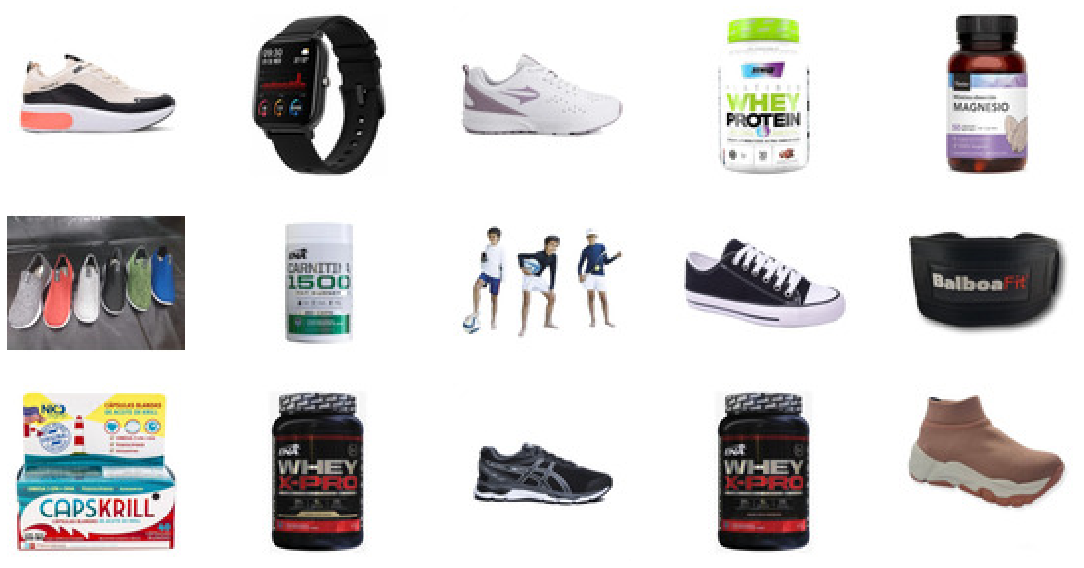

In [214]:
display_multiple_img('C:\\Users\\57310\\Documents\\MELI\\Images\\*.png',3,5)

## Tests

In [ ]:
# Dividir por características numércias, textuales y visuales para: 
# Determinar feature importance y sacar estadísticas de los datos con los que se cuenta por producto
 

### Categoría: deporte y fitness 

In [118]:
titles_=[]
marcas_=[]
image_=[]
for i in range(len(items['results'])):
    titles_.append(items['results'][i]['title']) 
    marcas_.append(items['results'][i]['attributes'][0]['value_name']) #extraer la marca
    image_.append(items['results'][i]['thumbnail'])

In [28]:
df_products = pd.DataFrame(columns=['nombre','categoria','marca','descripcion_producto','imagen'])

In [119]:
df_products['nombre'] = titles_
df_products['categoria'] = prod_categories[14]['name']
df_products['marca'] = marcas_
df_products['imagen'] = image_

#### Similitud entre títulos 

In [153]:
# NLP preprocesamiento 
#PUNCTUATION_TRANSLATOR =str.maketrans(' ',' ',string.punctuation + '?')

def pre_proc_nlp(text_df):
    cleaned_df =[]
    for text in text_df:
        clean_text = regex.sub(r'\&[a-z]+\;', '', text)
        clean_text = regex.sub(r"\n", " ", text)
        clean_text = text.lower()
        #clean_text = clean_text.translate(PUNCTUATION_TRANSLATOR)
        clean_text = regex.sub('[0-9]+', ' NUMB ', clean_text)
        clean_text = unidecode.unidecode(clean_text)
        clean_text = regex.sub(r'(NUMB\s+)(NUMB\s*)*', ' NUMB ', clean_text)
        clean_text = regex.sub(r'\s+', ' ', clean_text)
        clean_text = regex.sub('[^a-zA-Z]', ' ', clean_text).strip(' ')
        cleaned_df.append(clean_text)
    return cleaned_df

In [154]:
df_products['nombre_preproc'] = pre_proc_nlp(df_products['nombre'])

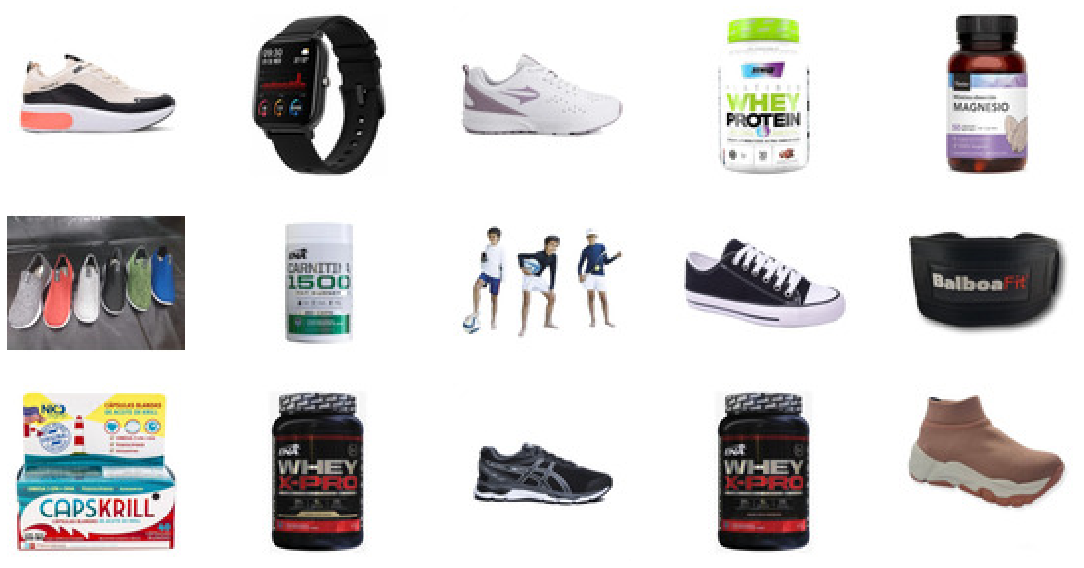

### Feature importance

In [ ]:
def plot_coefficients(classifier, feature_names, tick,top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 10))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.title(categ_dict[tick])
    plt.show()

In [ ]:
for tick in sorted(list(set(df_cat['numeric_category']))):
    if len(df_cat[df_cat['numeric_category']==tick]) > 1:
        cv_bow = CountVectorizer()
        X = cv_bow.fit_transform(df_cat['nombre_preproc']) 
        X_features = X.toarray()
        Y_labels = Y == tick
        svm = LinearSVC()
        svm.fit(X_features,Y_labels)
        plot_coefficients(svm,cv_bow.get_feature_names(),tick) # incluir el nombre de la clase por feature importance